<a href="https://colab.research.google.com/github/ayportella/ayportella/blob/main/01_geopandas_processos_minerarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Processos Minerários Ativos no estado de MG com Biblioteca Geopandas**
</br>
Andressa Yumi Portella</br>
Outubro de 2023

**GeoPandas** é um projeto open source que possibilita trabalhar com dados geoespaciais de maneira mais fácil.

Operações geométricas são performadas pela biblioteca **Shapely**.

Geopandas vai além da conhecida biblioteca Pandas, permitindo operações espaciais em tipos geométricos.

GeoPandas usa **Fiona** para acessar arquivos e **Matplotlib** para plotagem.

Um GeoDataFrame é formado por um DataFrame, do Pandas, e uma coluna Geometry onde ficam armazenadas as geometrias das feições.

**1. Geopandas**

In [56]:
# instalando a biblioteca geopandas com pip
!pip install geopandas

In [ ]:
!pip install matplotlib

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

**1.1 Origem dos dados**

Os dados de processos minerários ativos do estado de Minas Gerais do Sistema de Informações Geográficas da Mineração (SIGMINE) foram baixados do site 'dados.gov.br' em formato shapefile, e você pode acessá-los [aqui](https://dados.gov.br/dados/conjuntos-dados/sistema-de-informacoes-geograficas-da-mineracao-sigmine).

**1.2 Ingestão dos Dados**

In [42]:
data = gpd.read_file("MG.shp")

In [43]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [44]:
data.head(3)

PROCESSO  NUMERO   ANO  AREA_HA                                      ID  \
0   541/1935     541  1935  2358.23  {3061FDDF-E60F-45E1-B685-C6AEE6D44CCB}   
1  1203/1935    1203  1935    81.74  {A9B72EE9-6896-4373-A82E-EDC445E12108}   
2  1261/1935    1261  1935   221.03  {3B882A14-6B2A-4679-A5B4-ECF78EB25D64}   

                 FASE                                         ULT_EVENTO  \
0  CONCESSÃO DE LAVRA  436 - CONC LAV/DOCUMENTO DIVERSO PROTOCOLIZADO...   
1  CONCESSÃO DE LAVRA   470 - CONC LAV/EXIGÊNCIA PUBLICADA EM 12/07/2021   
2  CONCESSÃO DE LAVRA  1338 - CONC LAV/PLANO DE FECHAMENTO DE MINA PR...   

                                  NOME             SUBS            USO  UF  \
0               PASSAGEM MINERAÇÃO S/A  MINÉRIO DE OURO  Não informado  MG   
1    Águas Minerais de Patrocínio Ltda     ÁGUA MINERAL  Não informado  MG   
2  SAO BENTO COMERCIO DE MINERIOS LTDA     ÁGUA MARINHA  Não informado  MG   

     DSProcesso                                           geometry  
0  000.541/1935  POLYGON Z ((-43.43647 -20.34587 0.00000, -43.4...  
1  001.203/1935  POLYGON Z ((-46.84986 -18.87244 0.00000, -46.8...  
2  001.261/1935  POLYGON Z ((-43.26403 -20.81749 0.00000, -43.2...

**1.3 Visualizando os dados**

<Axes: >

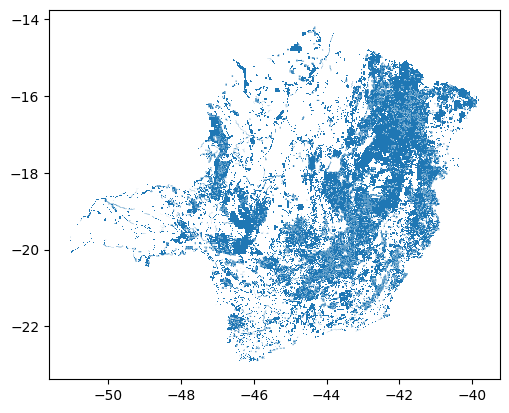

In [45]:
data.plot()

Vamos visualizar melhor os dados:

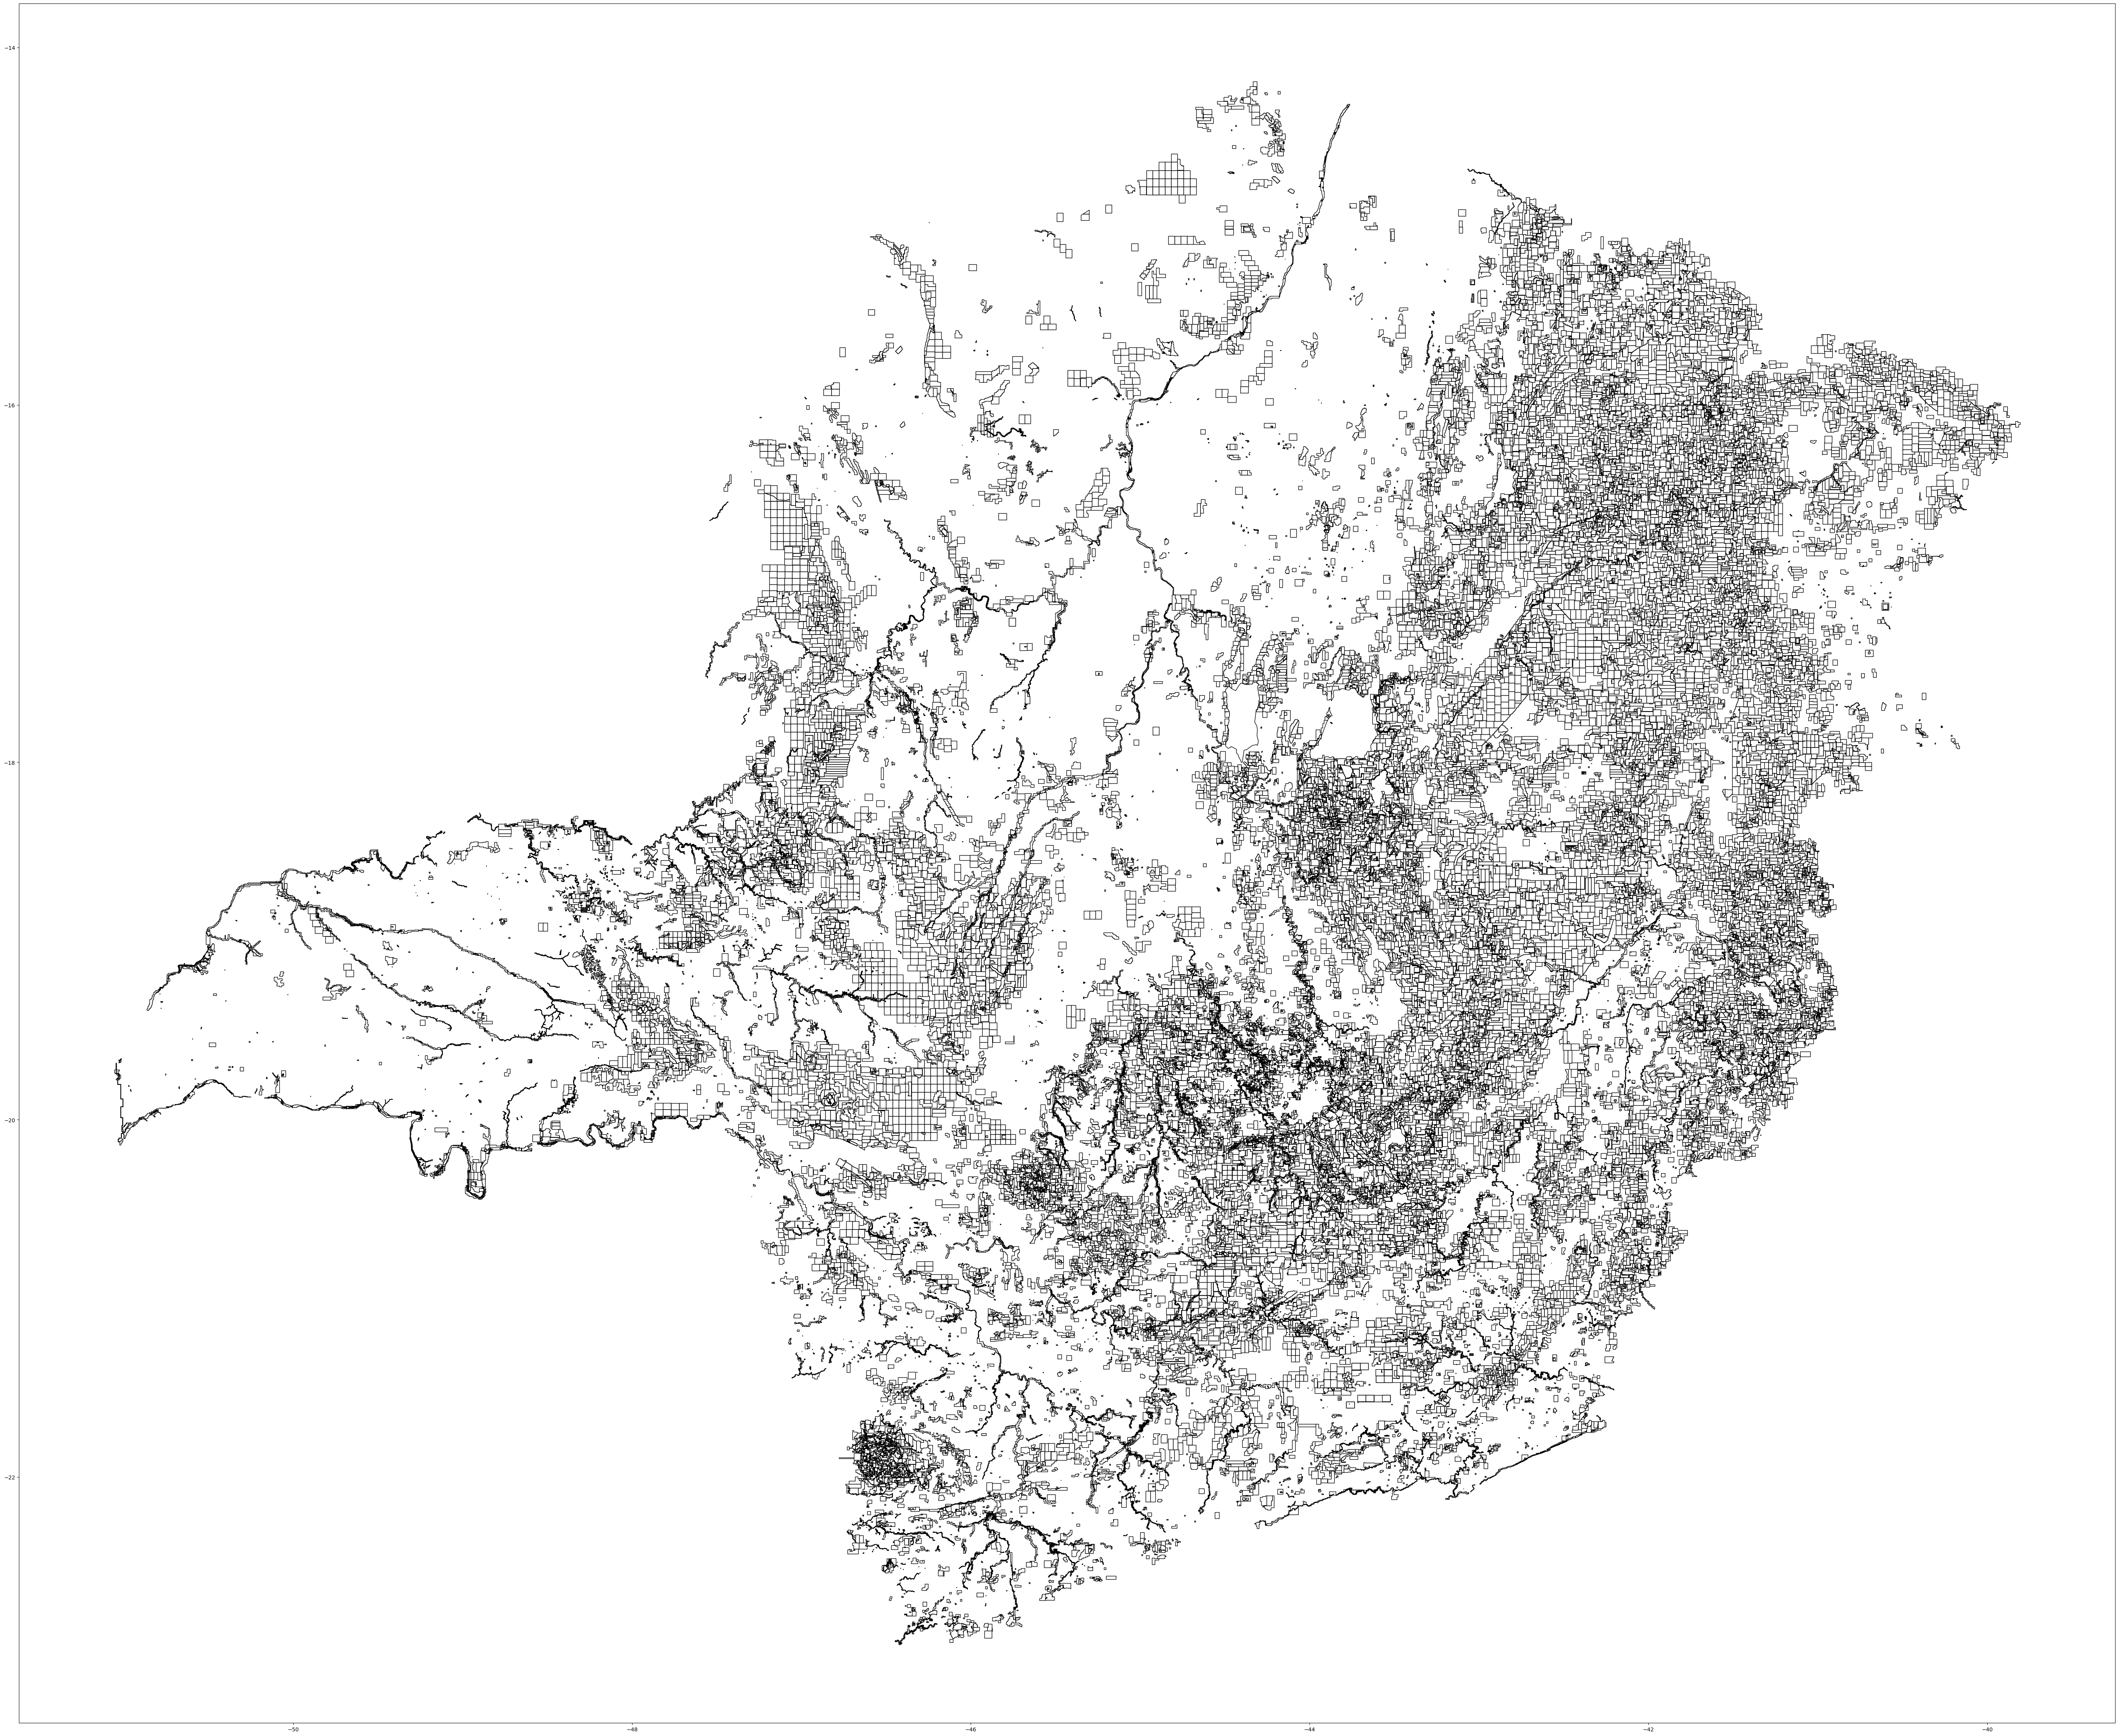

In [46]:
data.plot(figsize=(70,64), facecolor='white', edgecolor='black')
plt.show()

**1.4 Salvando os dados**

In [49]:
# filtrando por processos minerários com a substância de minério de ferro

processos_diamante = data[data['SUBS'] == 'DIAMANTE']

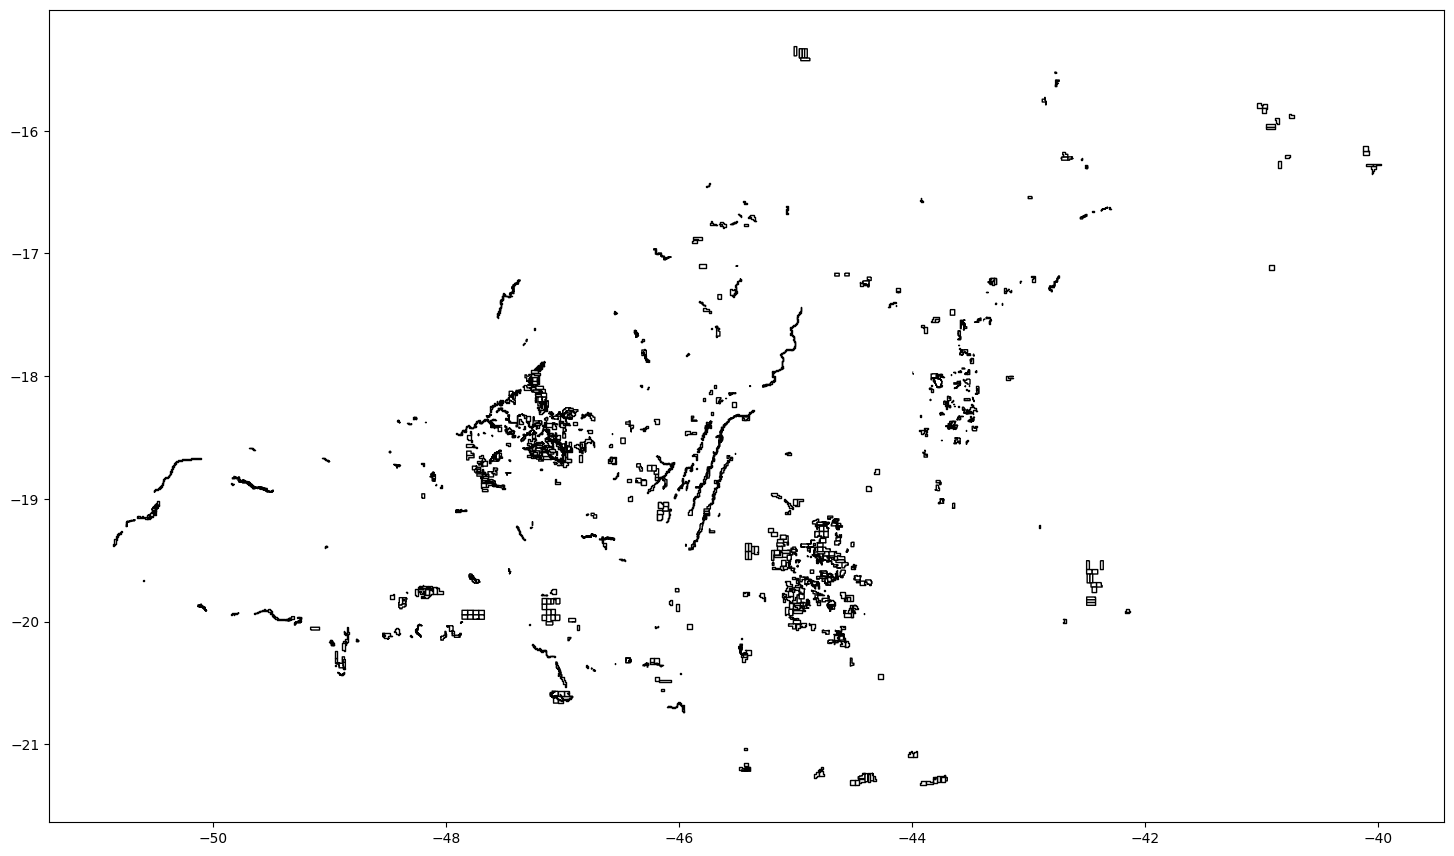

In [50]:
#mostrar a região filtrada
processos_diamante.plot(figsize=(18,18), facecolor='white', edgecolor='black')
plt.show()

Existem 4 principais zonas de concentração de ocorrências de diamantes, relacionadas às províncias diamantíferas do Alto Parnaíba, Oeste de São Francisco, Serra do Espinhaço e Serra da Canastra. </br>
É possivel notar concentrações específicas de localização de processos minerários ativos de diamante relacionadas a feições de direção nordeste-sudoeste, possivelmente relacionadas a rios. São depósitos aluvionares.

Você pode entender melhor sobre depósitos e ocorrências de diamantes em Minas Gerais nesse [link](http://recursomineralmg.codemge.com.br/substancias-minerais/diamante/#dep%C3%B3sitos-prim%C3%A1rios).

In [23]:
# salvando os dados filtrados em um shapefile
processos_diamante.to_file('processos_diamante.shp')

In [27]:
# salvando os dados filtrados em formato geojson
processos_diamante.to_file('processos_diamante.json', driver='GeoJSON')

**2. Shapely**

A biblioteca Shapely é usada para definir e realizar operações com os objetos geométricos como:


*   Criação de pontos, linhas e polígonos
*   Cálculo de área, tamanho e limite de objetos geométricos
*   Realização de operações geométricas típicas de programas de geoprocessamento, como união, interseção, diferença, distância, entre outros.




In [28]:
# instalando o shapely
!pip install shapely

**2.1 Ponto**

In [73]:
# criando uma geometria do tipo ponto
ponto = Point(4,7)

In [74]:
print(ponto)

POINT (4 7)


In [75]:
type(ponto)

shapely.geometry.point.Point

In [77]:
# utilizando as funcoes coords para saber as coordenadas
list(ponto.coords)

[(4.0, 7.0)]

In [78]:
# lendo x e y separadamente
x = ponto.x
y = ponto.y

print(x,y)

4.0 7.0


In [81]:
# calculando a distância entre dois pontos
ponto_1 = Point(2,4)
ponto_2 = Point(7,9)

distancia = ponto_2.distance(ponto_1)

print("Distância entre dois pontos:", distancia)

Distância entre dois pontos: 7.0710678118654755


**2.2 Linha**

In [30]:
# importando os objetos geométricos da biblioteca shapely
from shapely.geometry import Point, LineString, Polygon

In [31]:
# criando uma linha a partir do objeto pontos
ponto_1 = Point(2,4)
ponto_2 = Point(3,4)
ponto_3 = Point(6,8)

linha = LineString([ponto_1, ponto_2, ponto_3])


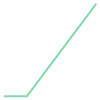

In [32]:
linha

In [33]:
print(linha)

LINESTRING (2 4, 3 4, 6 8)


In [34]:
type(linha)

shapely.geometry.linestring.LineString

In [35]:
# utilizando a função coords para ver os pontos da linha
list(linha.coords)

[(2.0, 4.0), (3.0, 4.0), (6.0, 8.0)]

In [37]:
# lendo x e y separadamente
coordenadas_x = list(linha.xy[0])
coordenadas_y = list(linha.xy[1])

print("coordenadas x:", coordenadas_x)
print("coordenadas y:", coordenadas_y)


coordenadas x: [2.0, 3.0, 6.0]
coordenadas y: [4.0, 4.0, 8.0]


In [39]:
# obtendo o comprimento da linha
linha.length

6.0

In [41]:
# obtendo as coordenandas do ponto central que representa essa linha
print(linha.centroid)

POINT (4.166666666666667 5.666666666666667)


**2.3 Polígono**

In [51]:
# criando um polígono com as coordenadas
poligono = Polygon([(2,4), (6,7), (3,9)])

O último ponto não precisa ser igual ao primeiro ponto criado, isso já é feito automaticamente pelo Shapely.

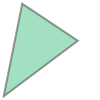

In [52]:
# visualizando o polígono criado anteriormente
poligono

In [53]:
print(poligono)

POLYGON ((2 4, 6 7, 3 9, 2 4))


In [54]:
type(poligono)

shapely.geometry.polygon.Polygon

In [55]:
# obtendo as coordenadas do polígono
list(poligono.exterior.coords)

[(2.0, 4.0), (6.0, 7.0), (3.0, 9.0), (2.0, 4.0)]

In [57]:
# calculando a area
poligono_area = poligono.area

print("Área =", poligono_area)

Área = 8.5


In [58]:
# pegando o centroide do poligono
poligono_centroide = poligono.centroid

print("Centroide:", poligono_centroide)

Centroide: POINT (3.666666666666667 6.666666666666666)


In [59]:
#obtendo as cordenandas do bounding box, um conjunto de pontos que englobe todos os pontos do polígono
poligono.bounds

(2.0, 4.0, 6.0, 9.0)

Você pode entender mais sobre bounding box [aqui](https://pt.wikipedia.org/wiki/Caixa_delimitadora_m%C3%ADnima).

**2.4 Operações básicas entre geometrias**

In [64]:
# criando dois círculos
circulo_1 = Point(1,2).buffer(1)
circulo_2 = Point(2,3).buffer(1)

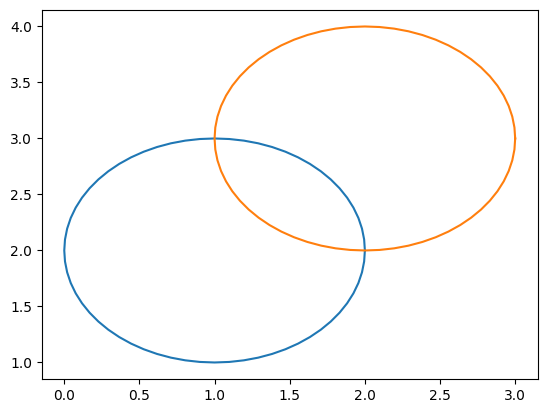

In [65]:
x,y = circulo_1.exterior.xy
plt.plot(x,y)

x,y = circulo_2.exterior.xy
plt.plot(x,y)

plt.show()

**2.4.1 Interseção**

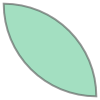

In [67]:
# operação de interseção
circulo_inter = circulo_1.intersection(circulo_2)
circulo_inter

**2.4.2 União**

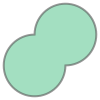

In [69]:
# operação união
circulo_uniao = circulo_1.union(circulo_2)
circulo_uniao

**2.4.3 Diferença**

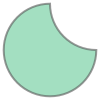

In [70]:
# operação de diferença
circulo_diff_1 = circulo_1.difference(circulo_2)
circulo_diff_1


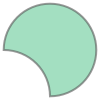

In [71]:
circulo_diff_2 = circulo_2.difference(circulo_1)
circulo_diff_2

**2.4.4 Diferença Simétrica**

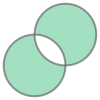

In [72]:
# operação de diferença simétrica
circulo_dif_simet = circulo_1.symmetric_difference(circulo_2)
circulo_dif_simet

**Conclusões**

A manipulação de dados espaciais pode ser feita a partir de programação em python a partir das bibliotecas Geopandas, Fiona, Shapely e Matplotlib.

É possível criar objetos como pontos, linhas e polígonos, usar funções básicas dos objetos geométricos e realizar operações entre essas geometrias.